In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from sklearn import cluster
from sklearn.cluster import KMeans

In [8]:
 def rgb2grayscale(im):
        """
            Converts RGB to Grayscale.
            @params: Input RGB image.
            @return: Grayscale image(1 channel)
        """
        if  len(im.shape) > 2:
            if im.shape[2] == 3: # Convert RGB image to Grayscale
                r, g, b = im[:, :, 0], im[:, :, 1], im[:, :, 2]
                grayscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
                return grayscale
        else:
            return im

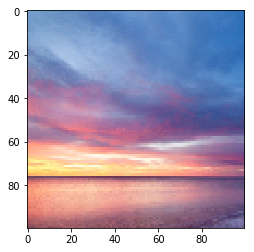

In [9]:
#Step1 : convert original image to grayscale
im = Image.open("sunset.jpg")
width=100
height=100
im2 = im.resize((width, height), Image.NEAREST)
im_array=np.array(im2)
#img = rgb2grayscale(np.array(im))
#img=np.float32(img)
plt.imshow(im_array)

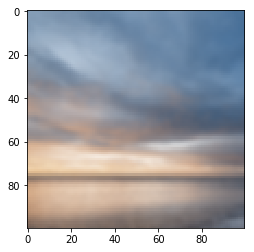

In [10]:

#Step 2: apply guassian filter
gaussian = gaussian_filter(im_array,1.0)
plt.imshow(gaussian)

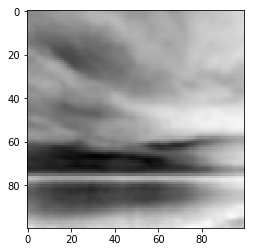

In [11]:
img = rgb2grayscale(gaussian)
plt.imshow(img, cmap='binary')

In [12]:
img_reshaped = img.reshape((-1,1))
img_reshaped.shape

(10000, 1)

In [13]:
#Step 3: apply K means clustering algorithm
#print(gaussian.shape)

#Step 4 reshape to give 2D array
#pixels=gaussian.reshape(gaussian.shape[0]*gaussian.shape[1],gaussian.shape[2])
#print(pixels.shape)

In [14]:
#Step 4: Kmeans

model = cluster.KMeans(n_clusters=8)
#model.fit(X)
model.fit(img_reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
#Step6: Labels array is shaped as a vector and need to be reshaped as an image (width x height)
pixel_centroids=model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids.shape[0]

10000

In [17]:
values = model.cluster_centers_.squeeze()
labels = model.labels_

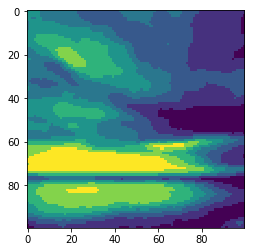

In [18]:
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape
plt.imshow(img_compressed)